<a href="https://colab.research.google.com/github/Rutvikk-Khar/Loan-Default-Prediction/blob/main/Loan_Default_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Investigating Loan Default Data

Checklist:

- Basic data cleaning and feature exploration

- Exploratory data analysis (Answering questions we have of the data)

- Basic Data Engineering (Creating a pipeline for tain and test sets)

- Model Experimentation and parameter tuning (Linear Regression, Random Forest, XGBoost, MLP)

- Feature Engineering

- Model Selection



##Data Dictionary



- Loan Amount: Loan Amount applied for in dollars
- Funded Amount: Actual amount funded by investor after fees
- Funded Amount Investor: Amount to be funded before fees
- Term: Loan Term in months
- Interest Rate: Interest rate assigned to loan
- Grade: Credit Grade of borrower application
- Sub Grade: Sub Grade of borrower application
- Employment Duration: Homeownership status
- Home Ownership: Income in dollars
- Verification Status: Verification status of reported income
- Loan Title: The reason for the borrower requesting a loan as written by the borrower
- Debit to Income: Debt to Income Ratio (Monthly debt divided by monthly income)
- Delinquency - two years: Number of delinquencies in the last two years
- Inquires - six months: Number of credit inquiries in the last 6 months
- Open Account: Number of active open credit line accounts
- Public Record: Number of derogatory public records
- Revolving Balance: The balance that carries over from one month to the next
- Revolving Utilities: Utilization refers to how much of your credit balance you're using at a given time (monthly)
- Total Accounts: Total accounts (open and closed)
- Total Received Interest: Total Interest payments received to date
- Total Received Late Fee: Total late payments received
- Recoveries: Total amount of money recovered by a lender after a loan has been charged off
- Collection Recovery Fee: Percentage of the amount recovered by the collection agency
- Collection 12 months Medical: Number of collections excluding medical
- Accounts Delinquent: Number of delinquent accounts or whether the account is delinquent. Not enough info.
- Total Collection Amount: Total amount ever recovered by collections
- Total Current Balance: Total credit line balance from all accounts
- Total Revolving Credit Limit: Total credit card limit across all accounts
- Loan Status: Whether the account defaulted or not. 1 = Defaulter, 0 = Non-Defaulter











In [1]:
!pip install pandas seaborn matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


%matplotlib inline
plt.style.use('seaborn-whitegrid')

<ipython-input-2-4fed05b11530>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
df = pd.read_csv('/content/train.csv')


df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [6]:
df.drop(['ID','Batch Enrolled','Revolving Utilities','Application Type'],axis=1,inplace=True)

In [7]:
df.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Grade', 'Sub Grade', 'Employment Duration',
       'Home Ownership', 'Verification Status', 'Payment Plan', 'Loan Title',
       'Debit to Income', 'Delinquency - two years', 'Inquires - six months',
       'Open Account', 'Public Record', 'Revolving Balance', 'Total Accounts',
       'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [8]:
df.rename({"Employment Duration":"HomeOwnership", "Total Current Balance":"Balance", "Loan Status":"Defaulted",'Loan Amount':"Amount"},axis=1, inplace=True)
df.rename({"Home Ownership":"Salary"},axis=1, inplace=True)

##Dropping NaN Values

In [9]:
#I see no use in any of the features being of object data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amount                        67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  object 
 6   Sub Grade                     67463 non-null  object 
 7   HomeOwnership                 67463 non-null  object 
 8   Salary                        67463 non-null  float64
 9   Verification Status           67463 non-null  object 
 10  Payment Plan                  67463 non-null  object 
 11  Loan Title                    67463 non-null  object 
 12  Debit to Income               67463 non-null  float64
 13  D

In [10]:
df.isna().sum()

Amount                          0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Interest Rate                   0
Grade                           0
Sub Grade                       0
HomeOwnership                   0
Salary                          0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Last week Pay                   0
Accounts Delinquent             0
Total Collection Amount         0
Balance                         0
Total Revolvin

**Consolidating Verification Status** \\
The "Verification Status" column currently contains three distinct values (Not Verified, Verified, Source Verified). To simplify our analysis, we will merge 'Source Verified' and 'Verified' into a single category named "Verified."

In [11]:
df.loc[df['Verification Status']=='Source Verified','Verification Status']= 'Verified'

In [12]:
df['Verification Status'].unique()

array(['Not Verified', 'Verified'], dtype=object)

**Rounding Interest Rates** \\
Adjusting the interest rate values by rounding to there ceiling values

In [13]:
df['Interest Rate']=np.ceil(df['Interest Rate'])

## Categorizing Loan Amounts to 4 Categories: (Micro, Small, Medium, Big)

In [14]:
def amount_map(amount):
    if amount<15000:
        return 'Small'
    if amount<25000:
        return 'Medium'
    else: return 'Big'

In [15]:
df['Loan Category']= df.Amount.map(amount_map)
df

,Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,HomeOwnership,Salary,Verification Status,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Balance,Total Revolving Credit Limit,Defaulted,Loan Category
0,10000,32236,12329.36286,59,12.0,B,C4,MORTGAGE,176346.62670,Not Verified,...,2.498291,0.793724,0,49,0,31,311301,6619,0,Small
1,3609,11940,12191.99692,59,13.0,C,D3,RENT,39833.92100,Verified,...,2.377215,0.974821,0,109,0,53,182610,20885,0,Small
2,28276,9311,21603.22455,59,13.0,F,D4,MORTGAGE,91506.69105,Verified,...,4.316277,1.020075,0,66,0,34,89801,26155,0,Big
3,11170,6954,17877.15585,59,17.0,C,C3,MORTGAGE,108286.57590,Verified,...,0.107020,0.749971,0,39,0,40,9189,60214,0,Small
4,16890,13226,13539.92667,59,16.0,C,D4,MORTGAGE,44234.82545,Verified,...,1294.818751,0.368953,0,18,0,430,126029,22579,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,59,10.0,C,A4,MORTGAGE,83961.15003,Verified,...,564.614852,0.865230,0,69,0,48,181775,34301,1,Small
67459,8323,11046,15637.46301,59,10.0,C,B3,RENT,65491.12817,Verified,...,2.015494,1.403368,0,14,0,37,22692,8714,0,Small
67460,15897,32921,12329.45775,59,20.0,A,F3,MORTGAGE,34813.96985,Verified,...,5.673092,1.607093,0,137,0,17,176857,42330,0,Medium
67461,16567,4975,21353.68465,59,14.0,D,E3,OWN,96938.83564,Not Verified,...,1.157454,0.207608,0,73,0,61,361339,39075,0,Medium


In [16]:
df.describe()

,Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Salary,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Balance,Total Revolving Credit Limit,Defaulted
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,16848.902776,15770.599114,14621.799323,58.173814,12.345908,80541.502522,23.299241,0.327127,0.145754,14.266561,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,8367.865726,8150.992662,6785.345170,3.327441,3.731843,45029.120366,8.451824,0.800888,0.473291,6.225060,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1014.000000,1014.000000,1114.590204,36.000000,6.000000,14573.537170,0.675299,0.000000,0.000000,2.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,10012.000000,9266.500000,9831.684984,58.000000,10.000000,51689.843335,16.756416,0.000000,0.000000,10.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,16073.000000,13042.000000,12793.682170,59.000000,12.000000,69335.832680,22.656658,0.000000,0.000000,13.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,22106.000000,21793.000000,17807.594120,59.000000,15.000000,94623.322785,30.048400,0.000000,0.000000,16.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,35000.000000,34999.000000,34999.746430,59.000000,28.000000,406561.536400,39.629862,8.000000,5.000000,37.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [17]:
df.groupby('Loan Category').count()

,Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,HomeOwnership,Salary,Verification Status,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Balance,Total Revolving Credit Limit,Defaulted
Loan Category,,,,,,,,,,,,,,,,,,,,,
Big,12896,12896,12896,12896,12896,12896,12896,12896,12896,12896,...,12896,12896,12896,12896,12896,12896,12896,12896,12896,12896
Medium,25233,25233,25233,25233,25233,25233,25233,25233,25233,25233,...,25233,25233,25233,25233,25233,25233,25233,25233,25233,25233
Small,29334,29334,29334,29334,29334,29334,29334,29334,29334,29334,...,29334,29334,29334,29334,29334,29334,29334,29334,29334,29334


## Data Visualization ##
**Number of Loans based on the Grid** \\
Becomes evident that Grades "B" and "C" are associated with the highest number of loans, whereas Grade "G" is rarely observed in loan applications.


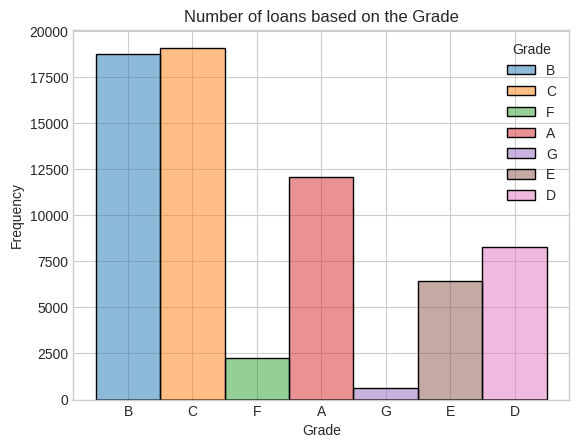

In [18]:
sns.histplot(x='Grade', hue="Grade",data=df)
plt.title("Number of loans based on the Grade")
plt.ylabel('Frequency');

**Loan Default Based on Grid**

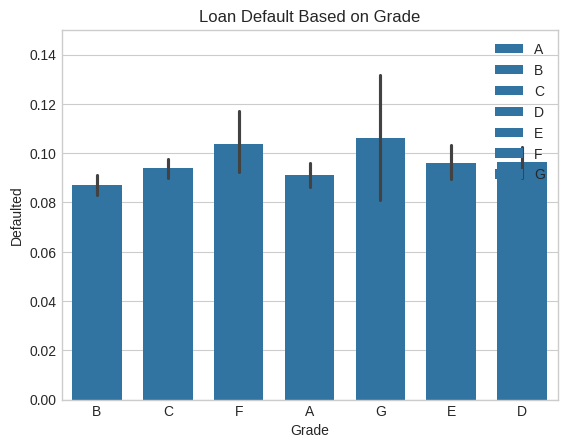

In [19]:
sns.barplot(x=df.Grade.sort_values(),y="Defaulted",data=df,width=0.7,label=df.Grade.sort_values().unique())
plt.ylim(0,0.15)
plt.title('Loan Default Based on Grade')
plt.legend(loc='upper right');

**Interest Rate vs. Default Rates**

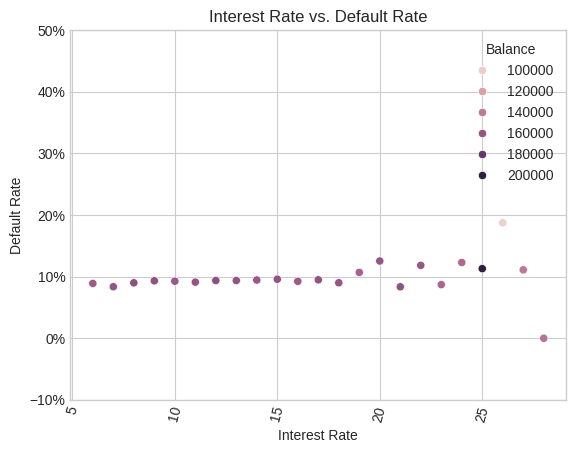

In [20]:
import matplotlib.ticker as mtick

sns.scatterplot(x=df['Interest Rate'].unique(),y=df.groupby('Interest Rate')['Defaulted'].mean(), hue=df.groupby('Interest Rate')['Balance'].mean())
plt.plot()
plt.ylim(-0.1,0.5)
plt.title('Interest Rate vs. Default Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Default Rate')
plt.xticks(rotation=75)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));

**Account Balance based on Loan Grade**

<ipython-input-21-3705de42e72f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.Grade.sort_values(),y="Balance", data=df, palette=unique_colors)


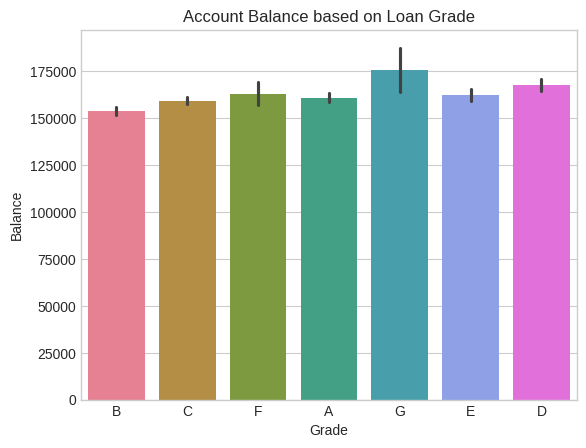

In [21]:
unique_colors = sns.color_palette('husl', len(df['Grade'].unique()))
sns.barplot(x=df.Grade.sort_values(),y="Balance", data=df, palette=unique_colors)
plt.title('Account Balance based on Loan Grade');

**Home Ownership vs Default Rates**

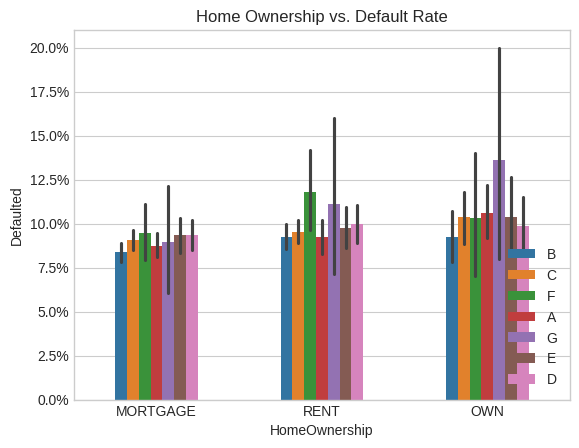

In [22]:
sns.barplot(x=df.HomeOwnership, y=df.Defaulted,data=df,hue='Grade',width=0.5)
plt.legend(loc='lower right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plt.title("Home Ownership vs. Default Rate");

**Loan Amount vs. Default Rates**

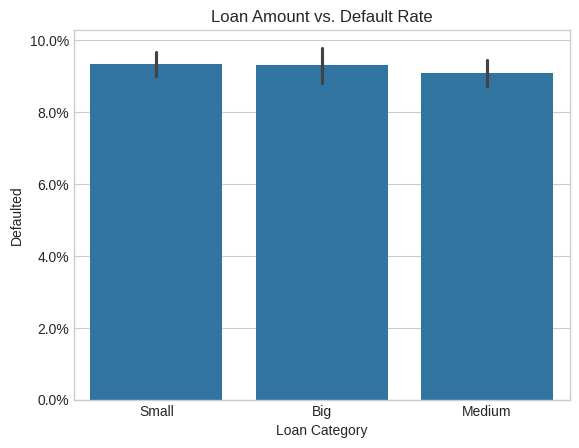

In [23]:
sns.barplot(x=df["Loan Category"], y=df['Defaulted'], data=df)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plt.title("Loan Amount vs. Default Rate");

## Logistic Regression

In [24]:
df.Salary

0        176346.62670
1         39833.92100
2         91506.69105
3        108286.57590
4         44234.82545
             ...     
67458     83961.15003
67459     65491.12817
67460     34813.96985
67461     96938.83564
67462    105123.15580
Name: Salary, Length: 67463, dtype: float64

In [25]:
df.head()

,Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,HomeOwnership,Salary,Verification Status,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Balance,Total Revolving Credit Limit,Defaulted,Loan Category
0,10000,32236,12329.36286,59,12.0,B,C4,MORTGAGE,176346.62670,Not Verified,...,2.498291,0.793724,0,49,0,31,311301,6619,0,Small
1,3609,11940,12191.99692,59,13.0,C,D3,RENT,39833.92100,Verified,...,2.377215,0.974821,0,109,0,53,182610,20885,0,Small
2,28276,9311,21603.22455,59,13.0,F,D4,MORTGAGE,91506.69105,Verified,...,4.316277,1.020075,0,66,0,34,89801,26155,0,Big
3,11170,6954,17877.15585,59,17.0,C,C3,MORTGAGE,108286.57590,Verified,...,0.107020,0.749971,0,39,0,40,9189,60214,0,Small
4,16890,13226,13539.92667,59,16.0,C,D4,MORTGAGE,44234.82545,Verified,...,1294.818751,0.368953,0,18,0,430,126029,22579,0,Medium


**Correlation Test** \\
Following a correlation test, no significant correlation was found between the analyzed variables.

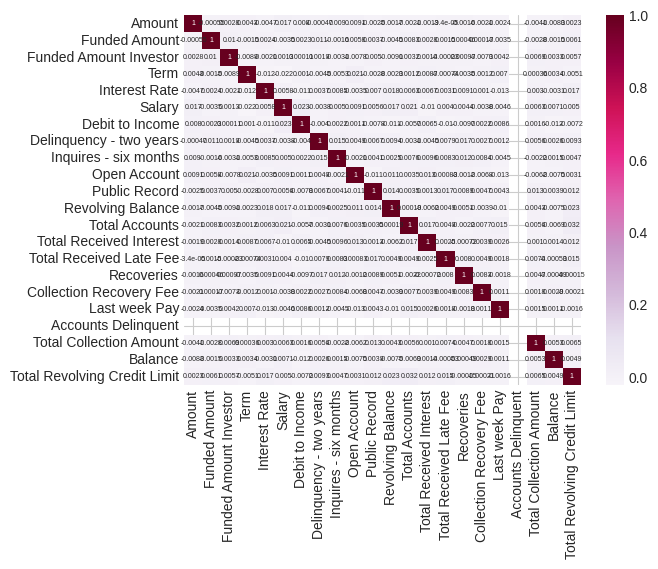

In [26]:
corr = df[['Amount','Funded Amount',"Funded Amount Investor",'Term','Interest Rate','Salary','Debit to Income'
          ,'Delinquency - two years',"Inquires - six months","Open Account","Public Record",'Revolving Balance'
          ,'Total Accounts','Total Received Interest',"Total Received Late Fee",'Recoveries',
          'Collection Recovery Fee','Last week Pay','Accounts Delinquent',"Total Collection Amount","Balance",
          "Total Revolving Credit Limit"]].corr()
sns.heatmap(corr, cmap = 'PuRd', annot= True,annot_kws={"size":5});

**Normal Distribution** \\
Upon analyzing the distribution of (Amount, Debit to Income, Last Week Pay), it is evident that the data follows a normal distribution. As a result, there is no necessity to employ a log scale for this dataset.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amount                        67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  object 
 6   Sub Grade                     67463 non-null  object 
 7   HomeOwnership                 67463 non-null  object 
 8   Salary                        67463 non-null  float64
 9   Verification Status           67463 non-null  object 
 10  Payment Plan                  67463 non-null  object 
 11  Loan Title                    67463 non-null  object 
 12  Debit to Income               67463 non-null  float64
 13  D

<ipython-input-28-6070fb5c1f59>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  col=cm.get_cmap('turbo')


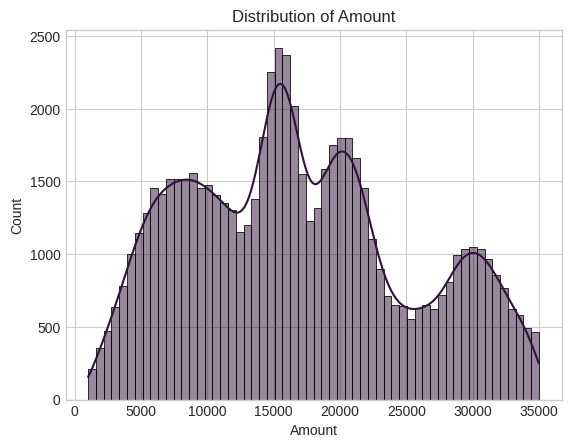

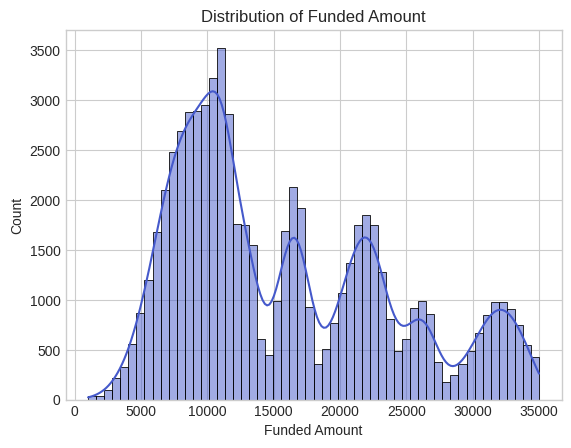

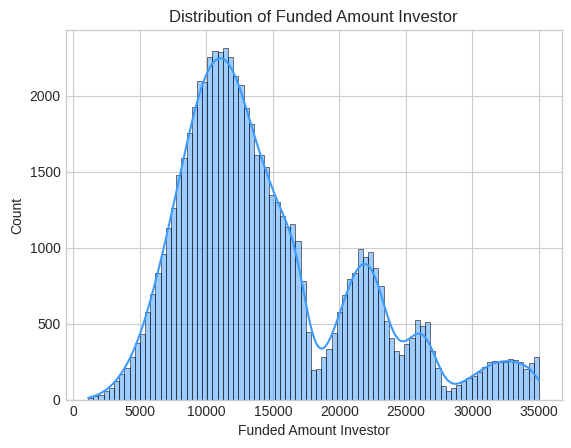

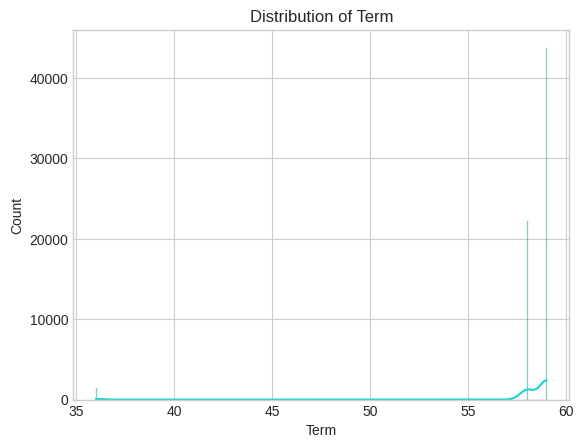

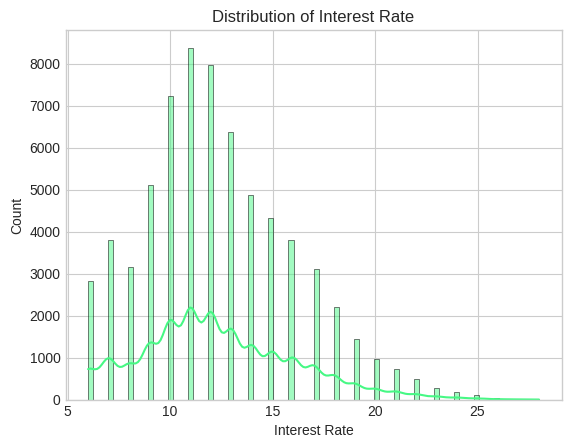

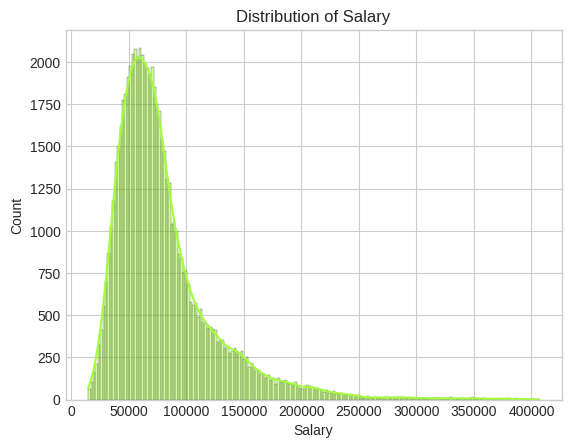

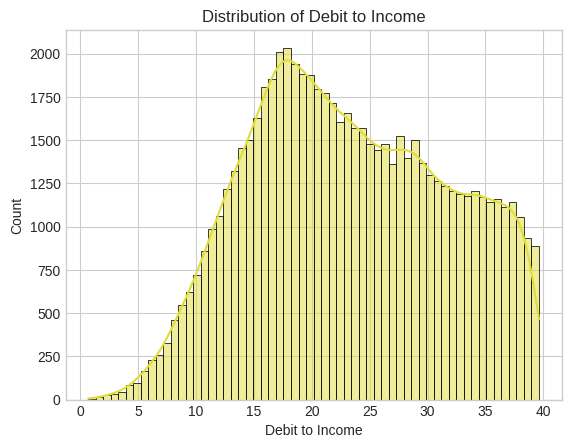

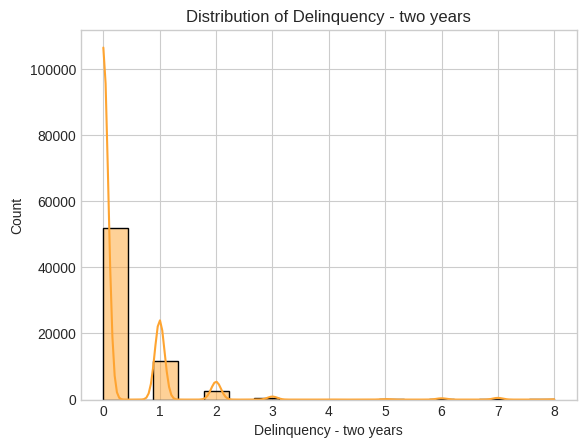

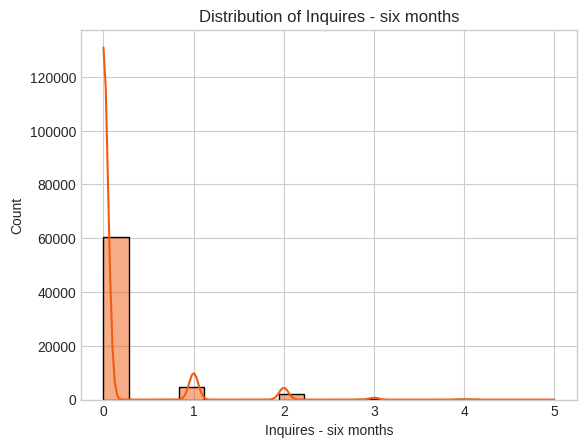

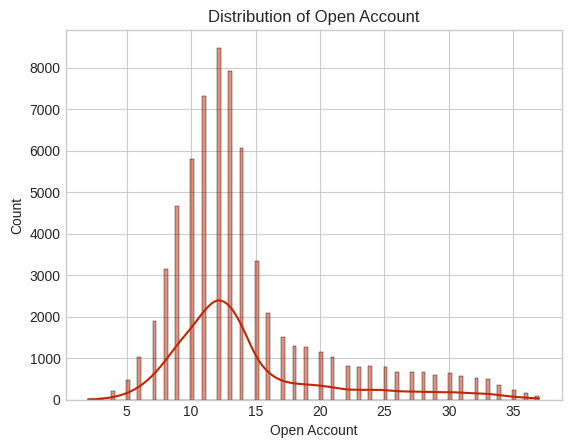

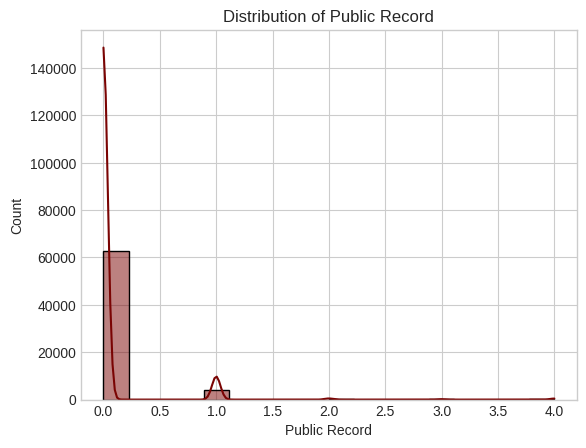

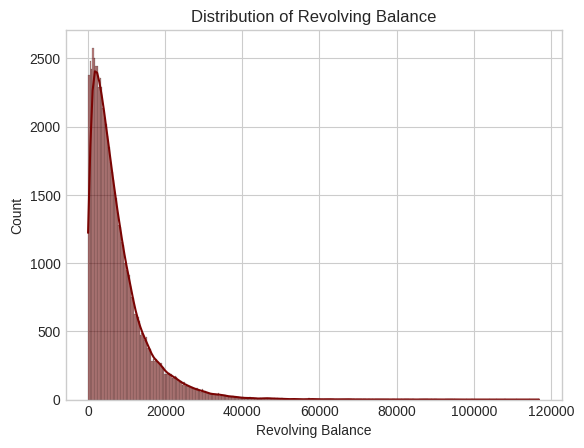

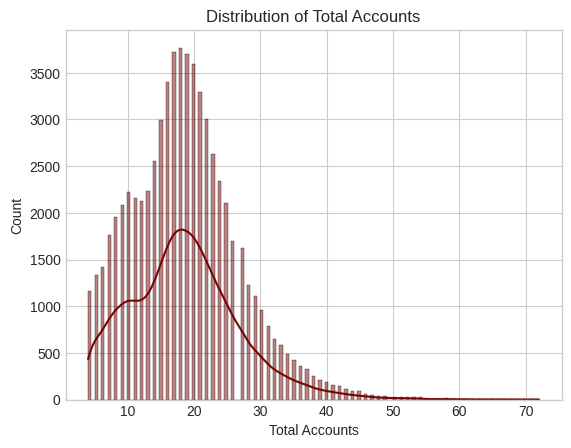

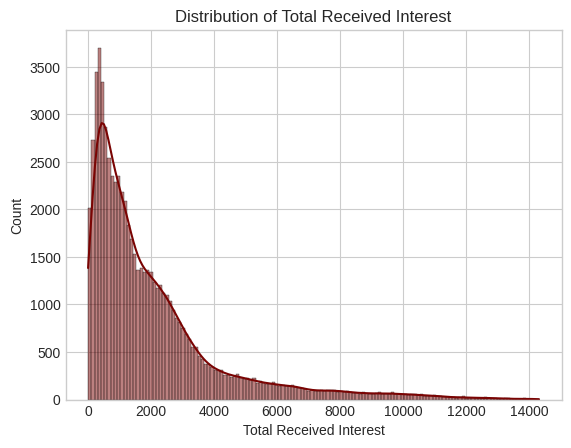

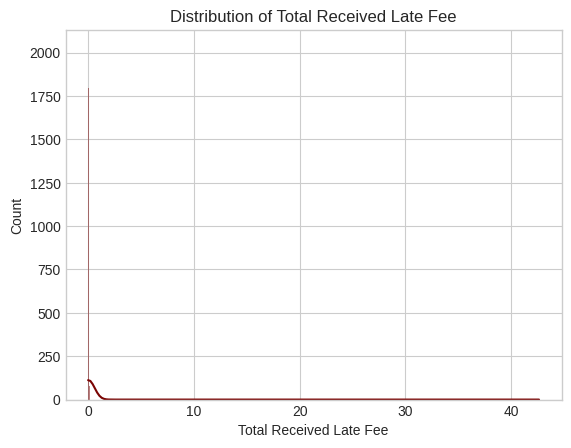

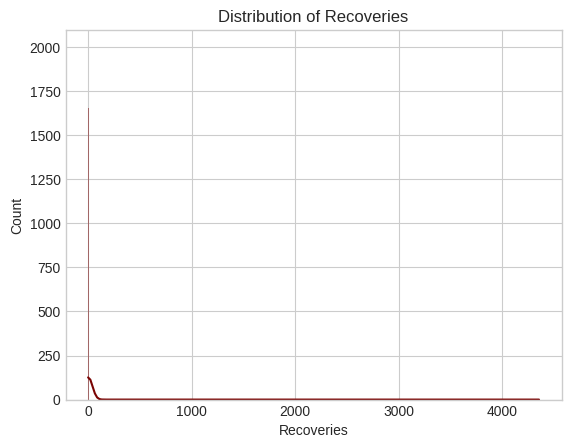

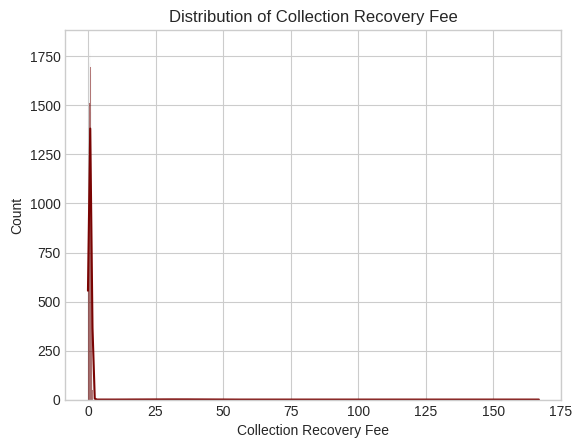

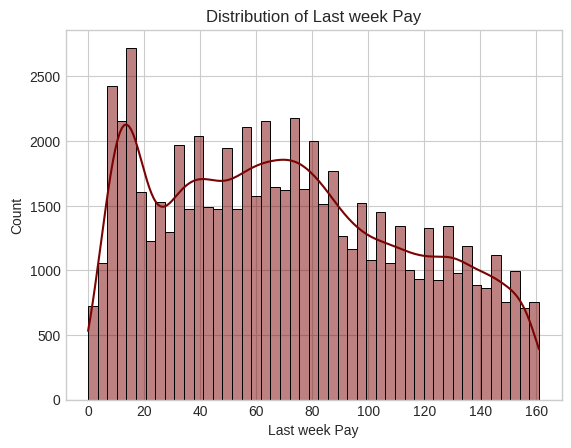

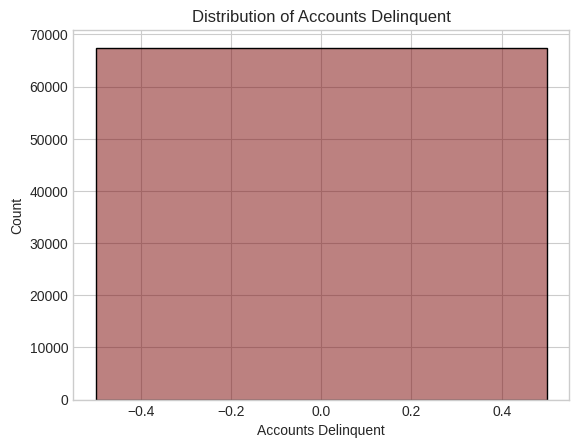

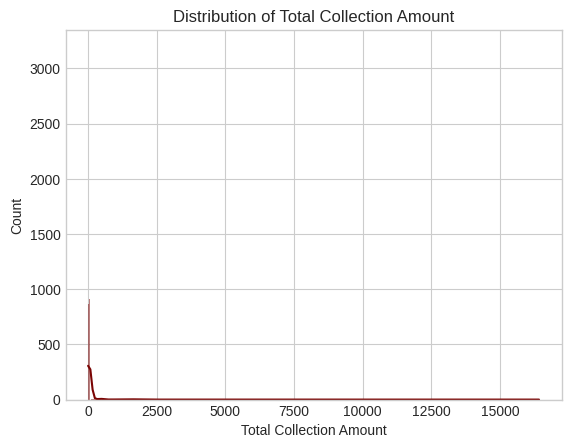

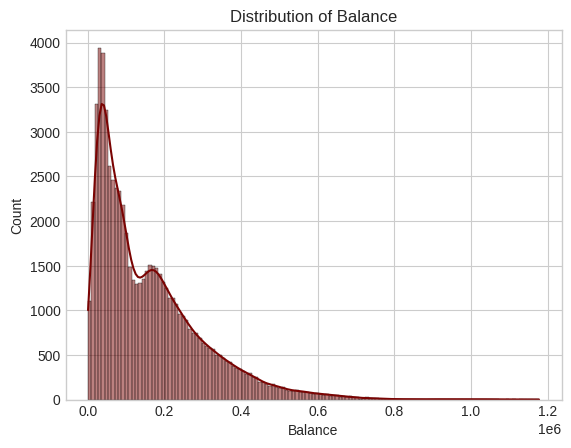

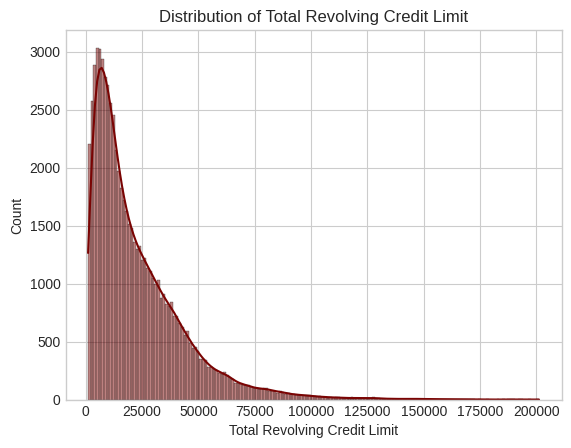

In [28]:
from matplotlib import cm
df_integ=df.drop(['Grade','Sub Grade','HomeOwnership','Verification Status','Payment Plan','Loan Title','Initial List Status',
                 'Loan Category'],axis=1)
columns=['Amount','Funded Amount',"Funded Amount Investor",'Term','Interest Rate','Salary','Debit to Income'
          ,'Delinquency - two years',"Inquires - six months","Open Account","Public Record",'Revolving Balance'
          ,'Total Accounts','Total Received Interest',"Total Received Late Fee",'Recoveries',
          'Collection Recovery Fee','Last week Pay','Accounts Delinquent',"Total Collection Amount","Balance",
          "Total Revolving Credit Limit"]
col=cm.get_cmap('turbo')
val=0
for i in columns:
    sns.histplot(x=df_integ[i], kde=True,color=col(val))
    plt.title('Distribution of '+i)
    plt.show()
    val+=0.1

**Log Scale Normal Distribution**

<ipython-input-29-72a684bf09d3>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  col=cm.get_cmap('hsv')


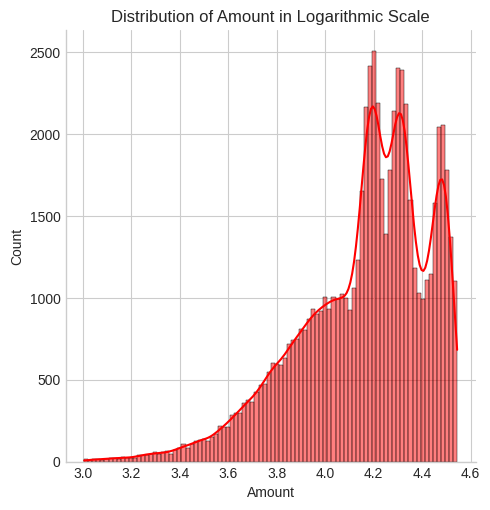

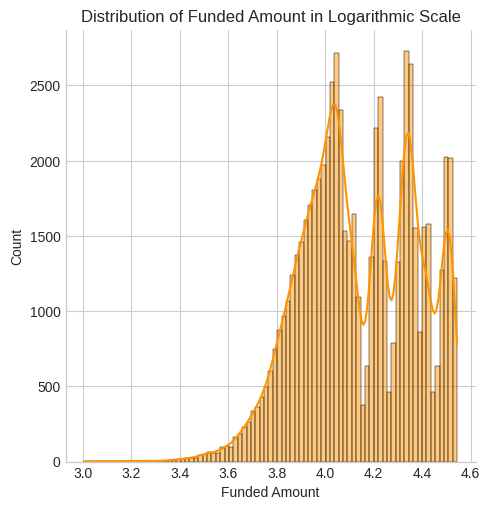

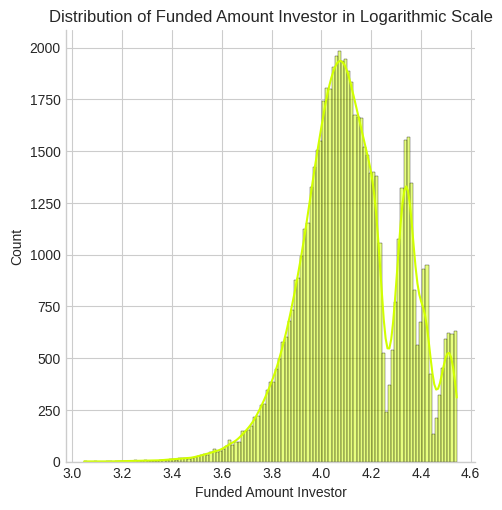

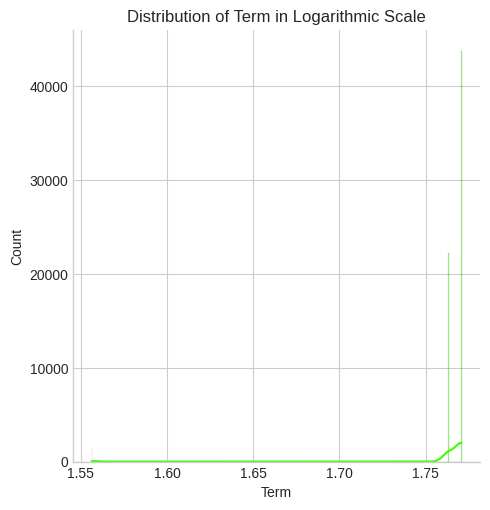

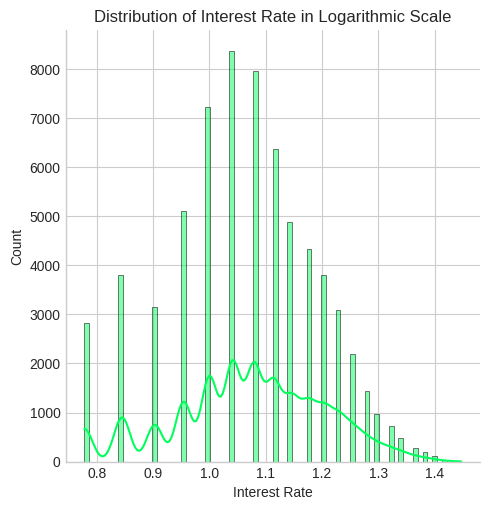

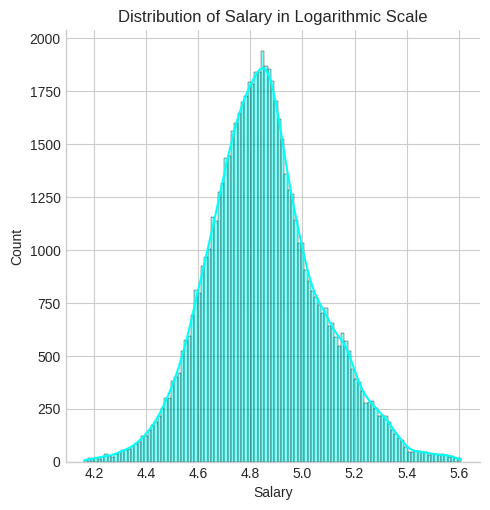

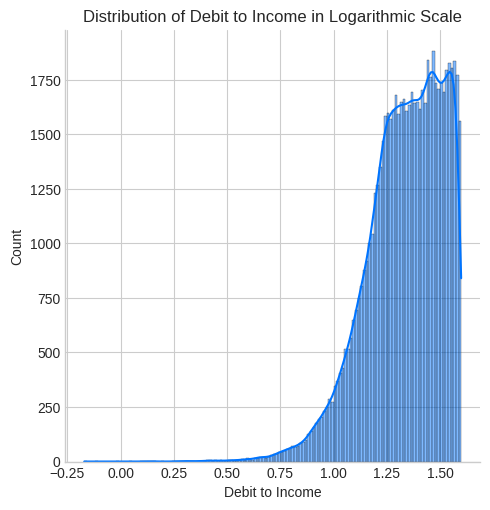

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


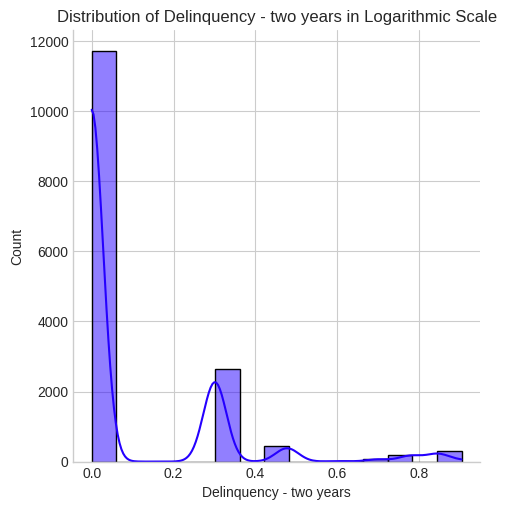

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


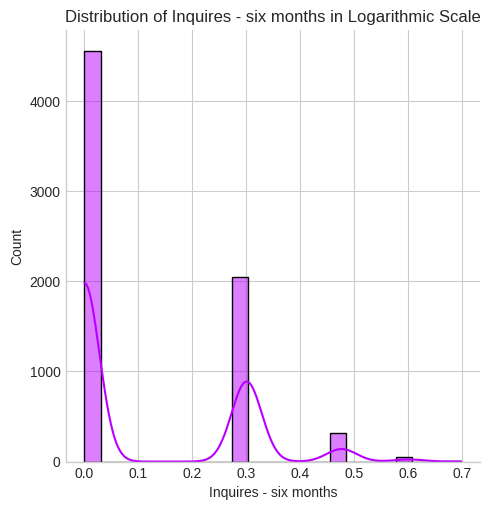

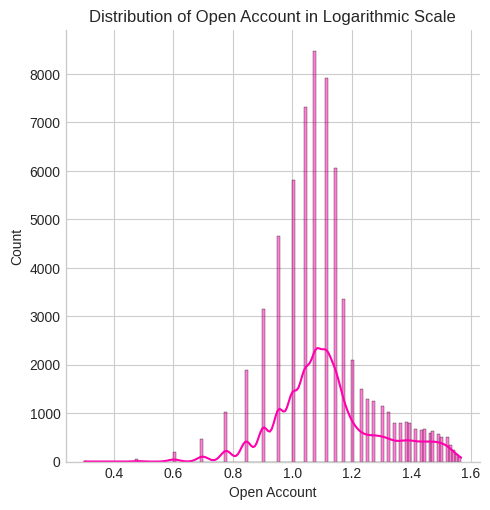

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


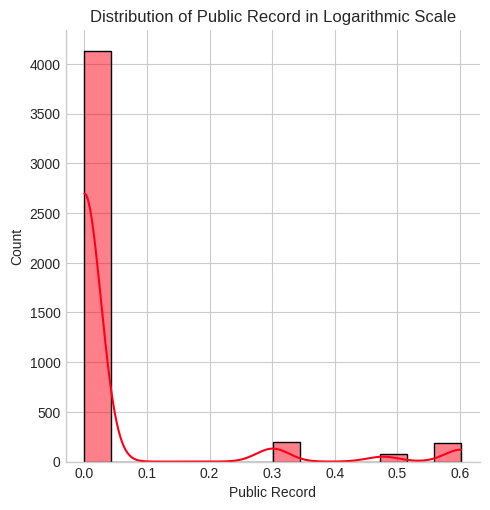

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


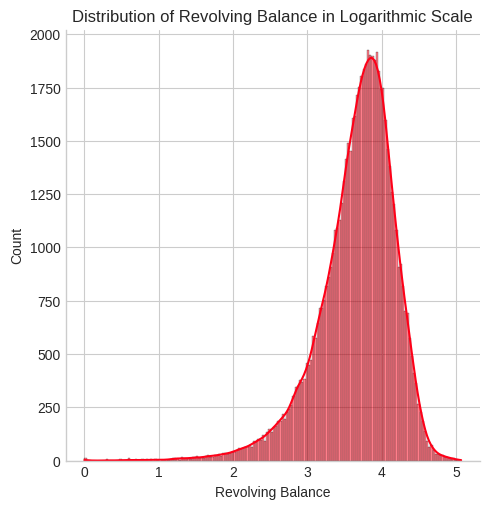

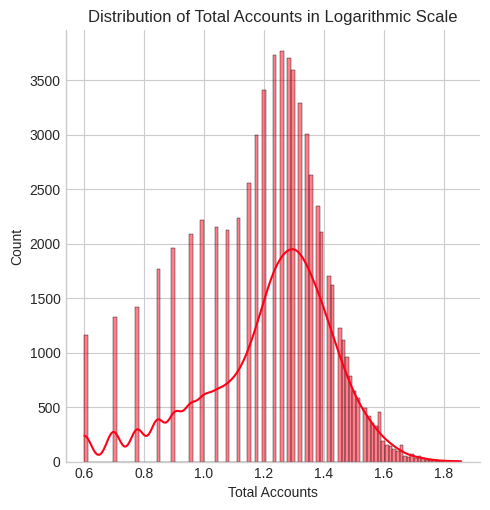

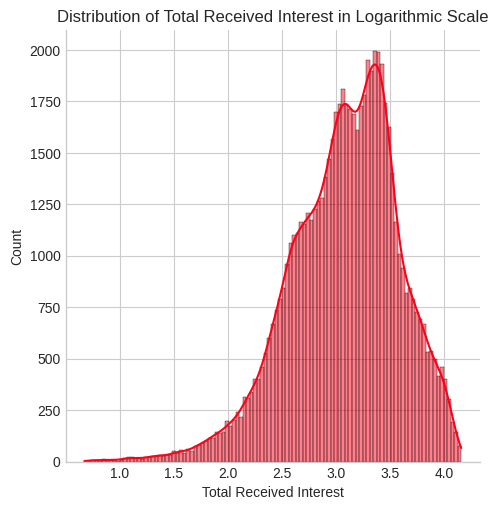

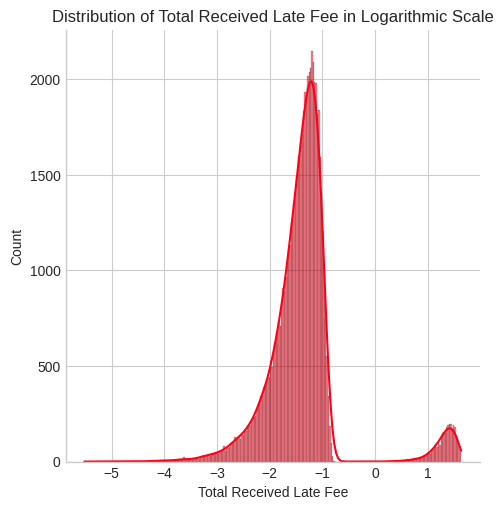

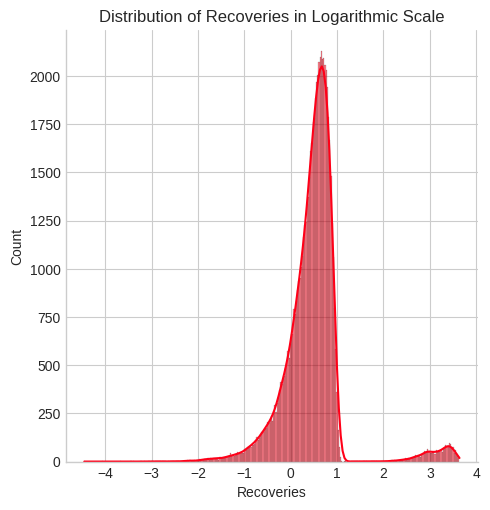

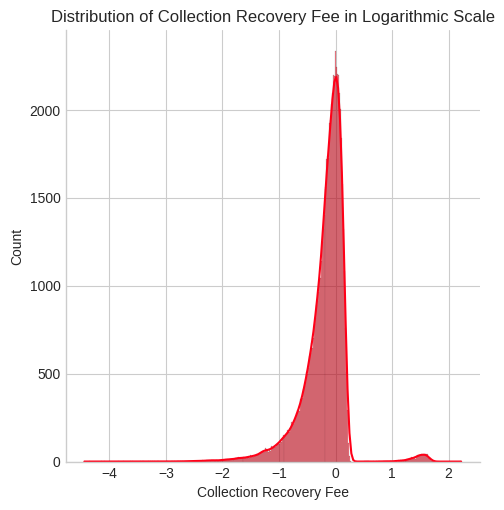

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


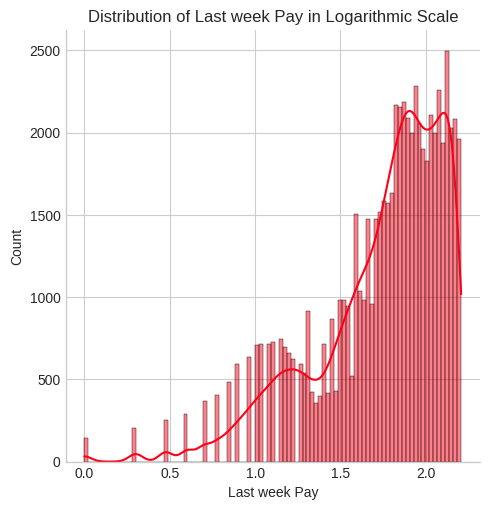

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


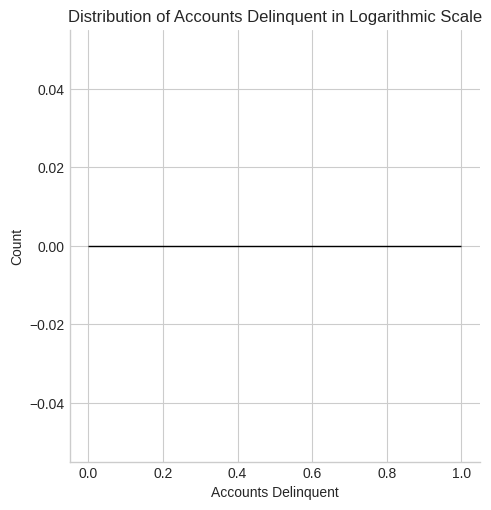

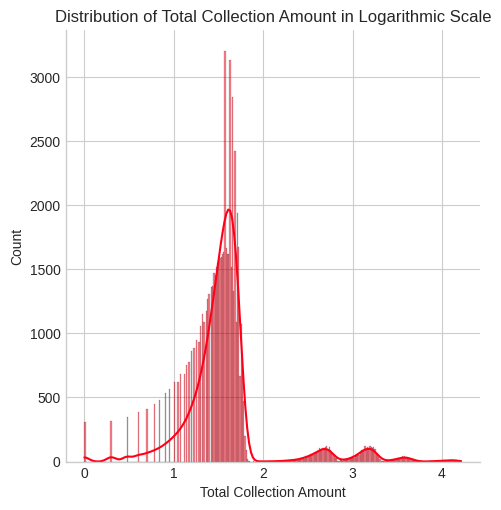

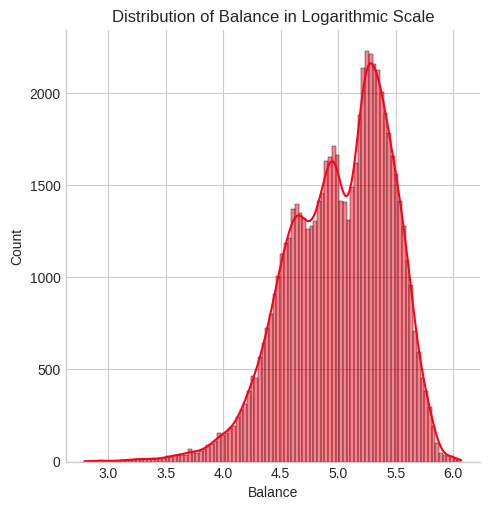

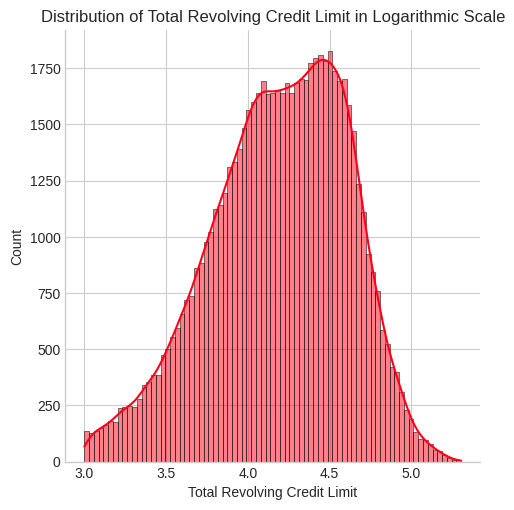

In [29]:
df_integ=df.drop(['Grade','Sub Grade','HomeOwnership','Verification Status','Payment Plan','Loan Title','Initial List Status',
                 'Loan Category'],axis=1)
columns=['Amount','Funded Amount',"Funded Amount Investor",'Term','Interest Rate','Salary','Debit to Income'
          ,'Delinquency - two years',"Inquires - six months","Open Account","Public Record",'Revolving Balance'
          ,'Total Accounts','Total Received Interest',"Total Received Late Fee",'Recoveries',
          'Collection Recovery Fee','Last week Pay','Accounts Delinquent',"Total Collection Amount","Balance",
          "Total Revolving Credit Limit"]
col=cm.get_cmap('hsv')
val=0
for i in columns:
    sns.displot(x=np.log10(df_integ[i]), kde=True,color=col(val))
    plt.title('Distribution of '+i+' in Logarithmic Scale')
    plt.show()
    val+=0.1

In [30]:
normal_columns = ['Amount', 'Debit to Income', 'Last week Pay']
log_columns= ['Funded Amount Investor', 'Interest Rate', 'Salary', "Inquires - six months", 'Open Account',
              'Revolving Balance','Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
              'Recoveries', 'Collection Recovery Fee', 'Total Collection Amount']

for i in log_columns:
    df_integ[i]=np.log10(df_integ[i])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
drop_columns=['Funded Amount','Term','Delinquency - two years',"Public Record",'Accounts Delinquent',"Total Revolving Credit Limit"]
df.drop(drop_columns, axis=1,inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amount                        67463 non-null  int64  
 1   Funded Amount Investor        67463 non-null  float64
 2   Interest Rate                 67463 non-null  float64
 3   Grade                         67463 non-null  object 
 4   Sub Grade                     67463 non-null  object 
 5   HomeOwnership                 67463 non-null  object 
 6   Salary                        67463 non-null  float64
 7   Verification Status           67463 non-null  object 
 8   Payment Plan                  67463 non-null  object 
 9   Loan Title                    67463 non-null  object 
 10  Debit to Income               67463 non-null  float64
 11  Inquires - six months         67463 non-null  int64  
 12  Open Account                  67463 non-null  int64  
 13  R

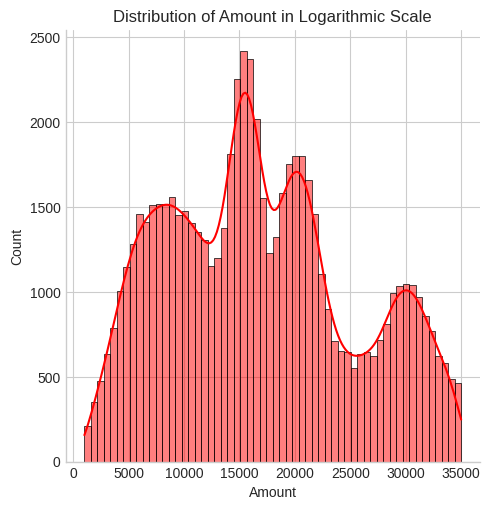

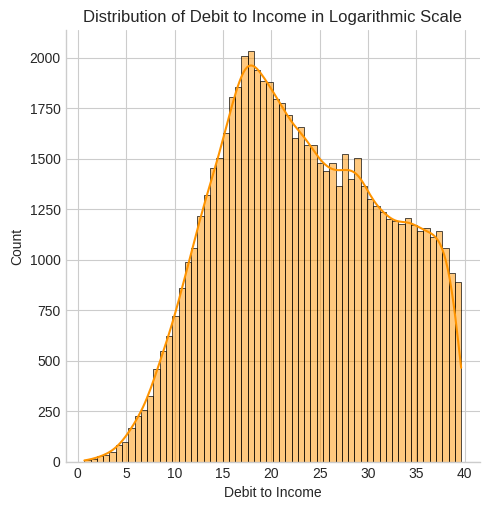

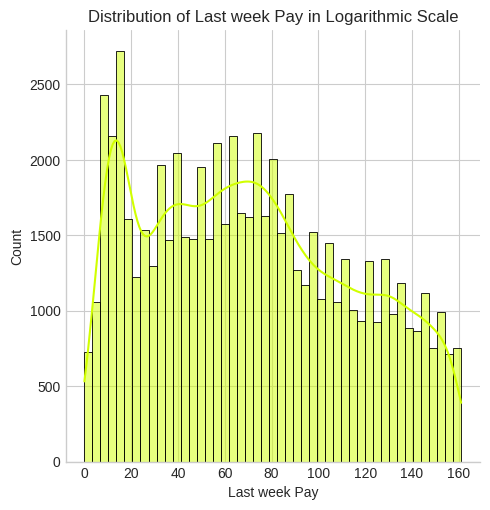

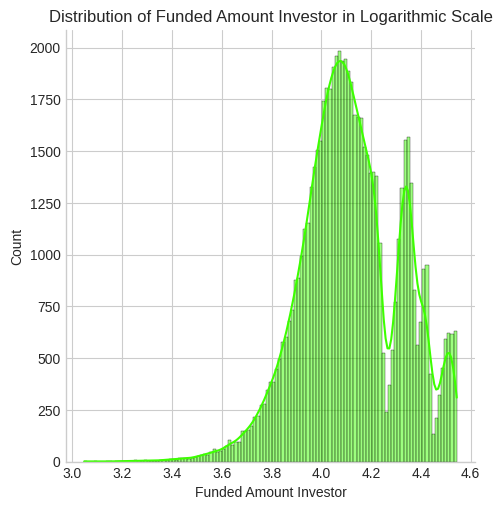

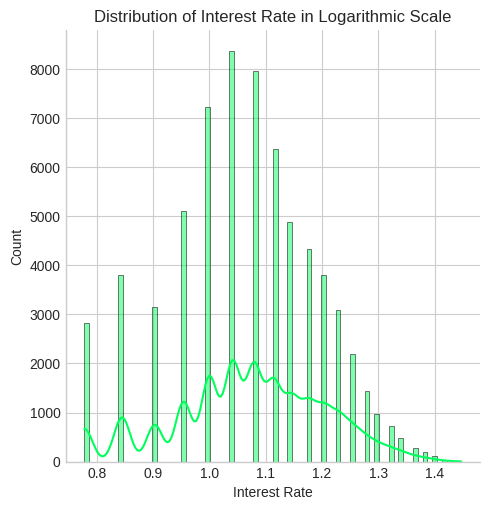

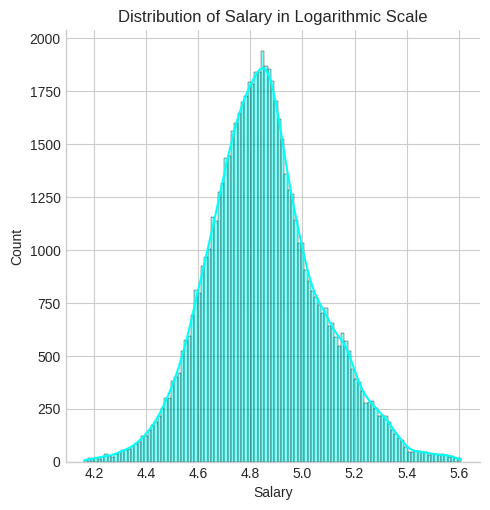

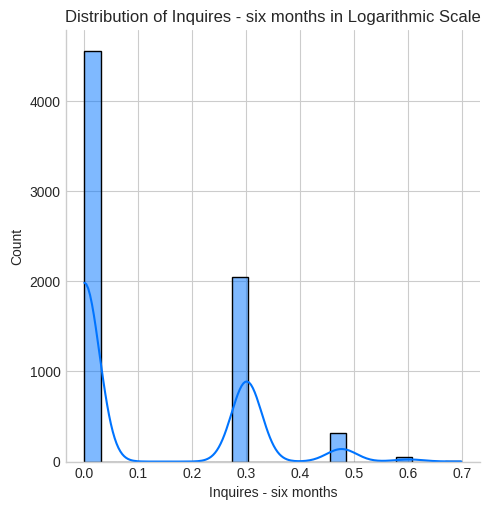

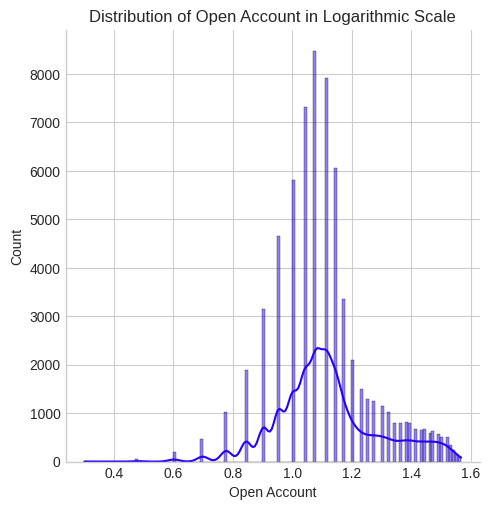

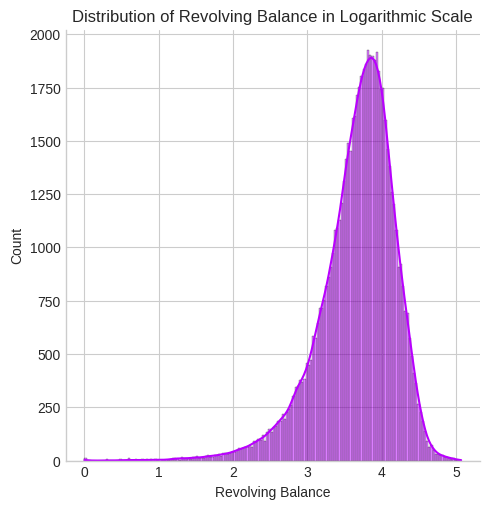

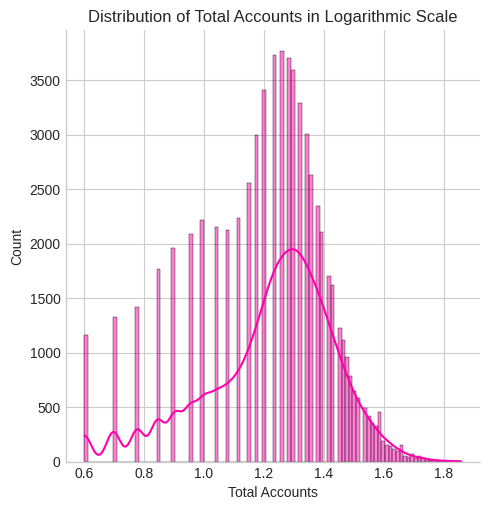

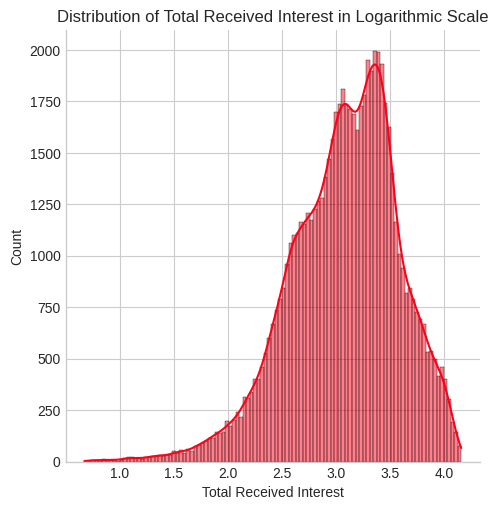

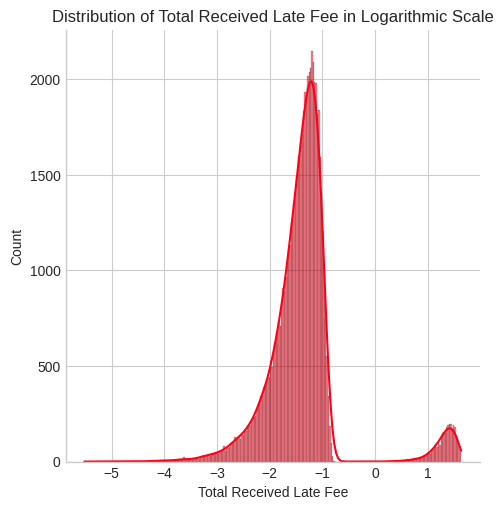

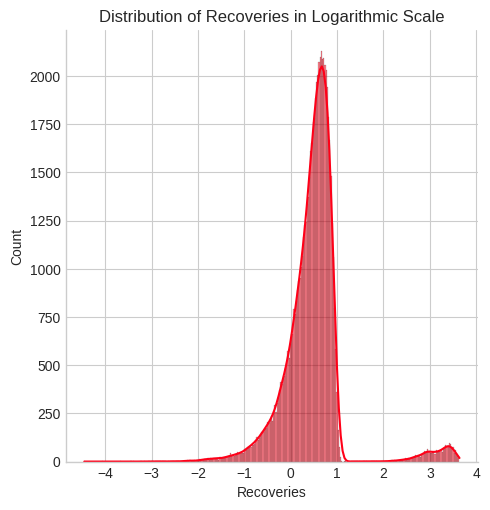

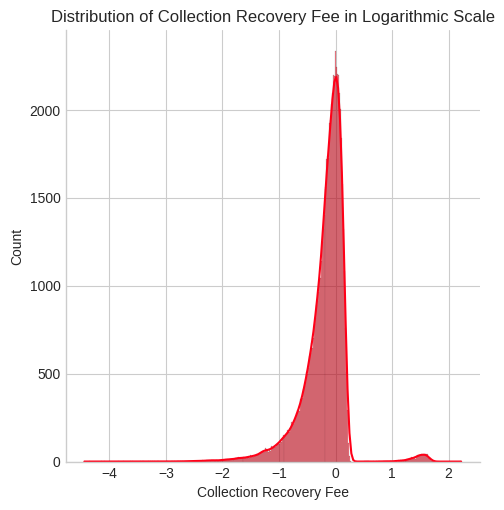

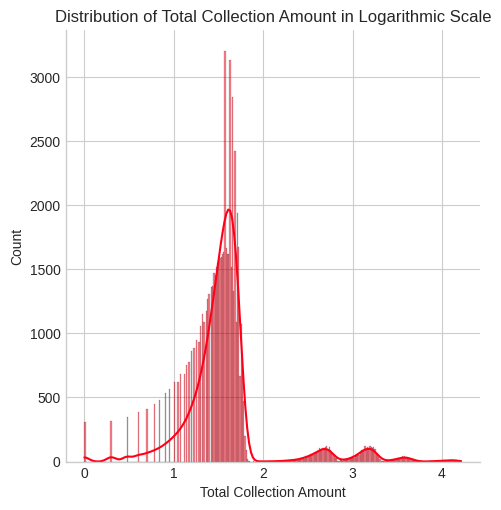

In [33]:
numeric_columns=['Amount', 'Debit to Income', 'Last week Pay','Funded Amount Investor', 'Interest Rate', 'Salary', "Inquires - six months", 'Open Account',
              'Revolving Balance','Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
              'Recoveries', 'Collection Recovery Fee', 'Total Collection Amount']
val=0
for i in numeric_columns:
    sns.displot(x=(df_integ[i]), kde=True,color=col(val))
    plt.title('Distribution of '+i+' in Logarithmic Scale')
    plt.show()
    val+=0.1

In [34]:
for i in numeric_columns:
    df[i]=df_integ[i]

## Violin Plot Distribution ##
**Default Ratio Analysis based on Grade Distribution** \\
Upon examination of the defaulted ratio across different loan grades, we observe a relatively consistent pattern with minor variations, particularly in Grades G and F. \\

**Default Ratio Analysis based on Sub Grade Distribution** \\
Similarly, the defaulted ratio remains consistent across different sub-grades. \\

**Default Ratio Analysis based on Home Ownership Distribution** \\
Similarly, the defaulted ratio remains consistent across different ownerships. \\

**Default Ratio Analysis based on Verification Status** \\
Similarly, the defaulted ratio remains consistent across different Verification Status. \\

**Default Ratio Analysis based on Initial List Status** \\
Similarly, the defaulted ratio remains consistent across different Initial List Status. \\

**Timely Repayment Dominance** \\
Notably, the majority of loans exhibit timely repayment, as evidenced by the distribution analysis.




In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amount                        67463 non-null  int64  
 1   Funded Amount Investor        67463 non-null  float64
 2   Interest Rate                 67463 non-null  float64
 3   Grade                         67463 non-null  object 
 4   Sub Grade                     67463 non-null  object 
 5   HomeOwnership                 67463 non-null  object 
 6   Salary                        67463 non-null  float64
 7   Verification Status           67463 non-null  object 
 8   Payment Plan                  67463 non-null  object 
 9   Loan Title                    67463 non-null  object 
 10  Debit to Income               67463 non-null  float64
 11  Inquires - six months         67463 non-null  float64
 12  Open Account                  67463 non-null  float64
 13  R

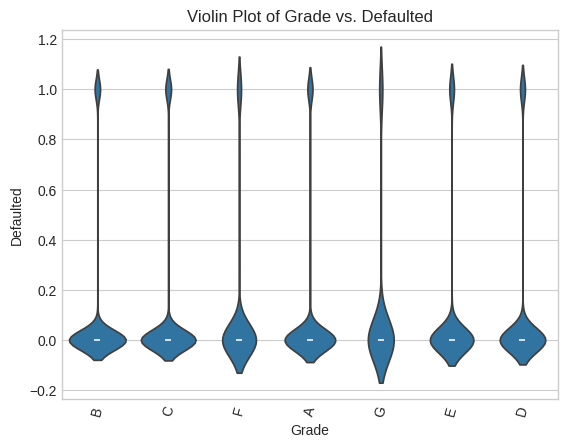

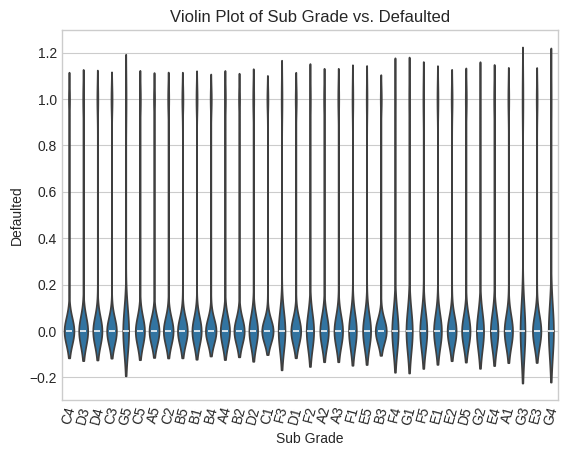

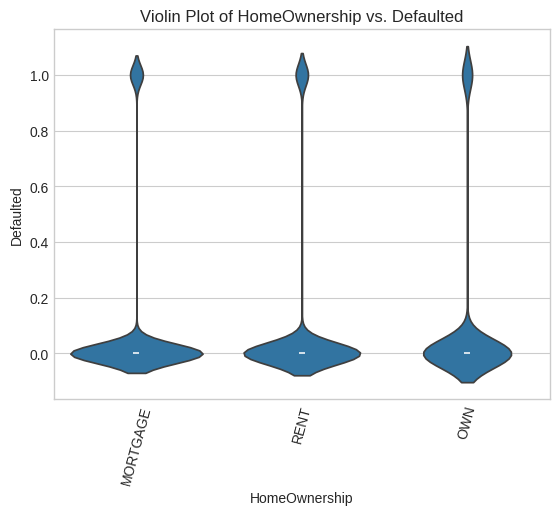

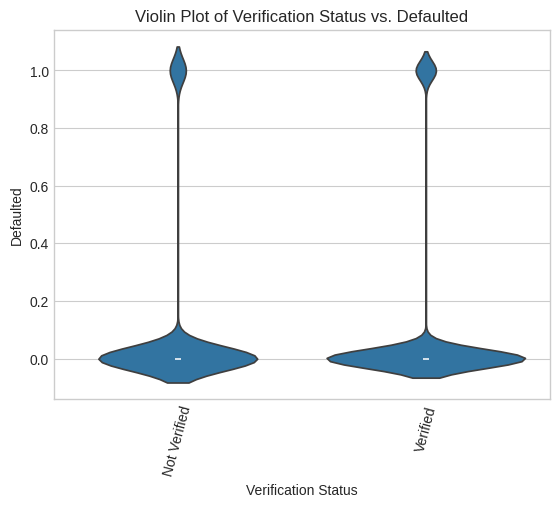

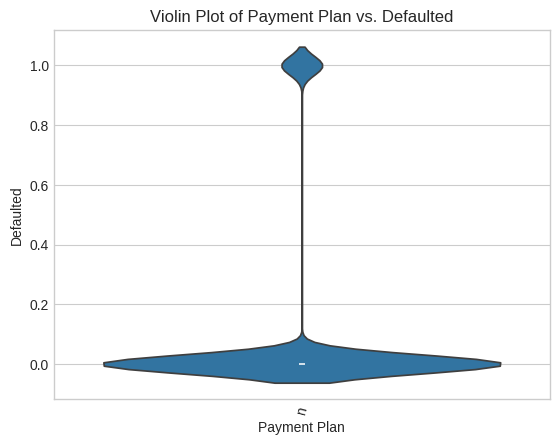

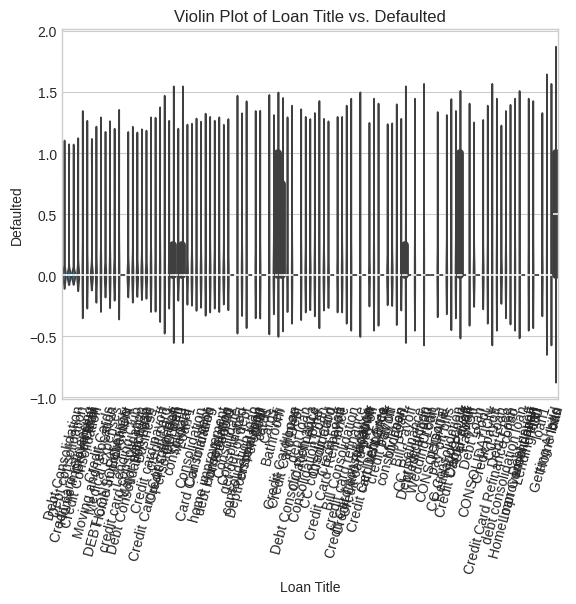

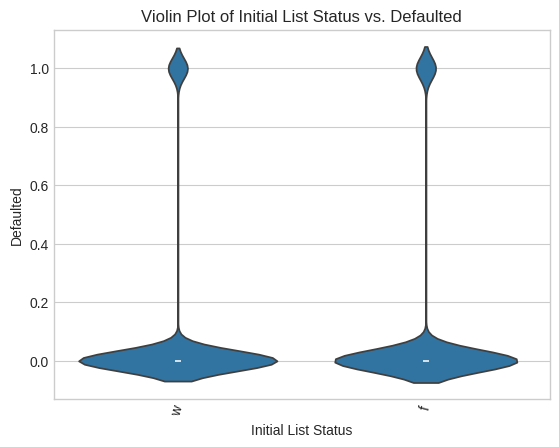

In [43]:
str_columns=['Grade','Sub Grade','HomeOwnership','Verification Status','Payment Plan','Loan Title','Initial List Status']
for i in str_columns:
    sns.violinplot(x=i, y="Defaulted", data=df)
    plt.xticks(rotation=75)
    plt.title('Violin Plot of '+ i+' vs. Defaulted');
    plt.show()

In [44]:
df.drop(['Loan Title','Payment Plan','Loan Category'],axis=1, inplace=True)

## Data PreProcessing
### Converting Categorical Variables into Numeric Values



*   Opting not to use the "Loan Category" column due to high correlation with "Amount" column.
*   Excluding "Loan Title", "Payment Plan", and "Verification Status" from analysis for simplicity.



In [45]:
df.drop('Collection 12 months Medical',axis=1,inplace=True)

In [46]:
categorical_variables=['Grade','Sub Grade',"HomeOwnership",'Initial List Status','Verification Status']
df_encode=pd.get_dummies(data=df, columns=categorical_variables,prefix='Col',drop_first=True,prefix_sep="_", dtype='int8')

In [47]:
df_encode

,Amount,Funded Amount Investor,Interest Rate,Salary,Debit to Income,Inquires - six months,Open Account,Revolving Balance,Total Accounts,Total Received Interest,...,Col_F5,Col_G1,Col_G2,Col_G3,Col_G4,Col_G5,Col_OWN,Col_RENT,Col_w,Col_Verified
0,10000,4.090941,1.079181,5.246367,16.284758,-inf,1.113943,4.384640,0.845098,3.466815,...,0,0,0,0,0,0,0,0,1,0
1,3609,4.086075,1.113943,4.600253,15.412409,-inf,1.079181,2.909556,1.113943,2.888050,...,0,0,0,0,0,0,0,1,0,1
2,28276,4.334519,1.113943,4.961453,28.137619,-inf,1.146128,3.265525,1.301030,2.936174,...,0,0,0,0,0,0,0,0,1,1
3,11170,4.252298,1.230449,5.034575,18.043730,-inf,0.845098,4.140477,1.079181,2.459654,...,0,0,0,0,0,0,0,0,1,1
4,16890,4.131616,1.204120,4.645764,17.209886,0.477121,1.113943,3.188647,1.342423,2.111395,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,4.119760,1.000000,4.924078,28.105127,-inf,1.113943,3.614053,1.278754,3.296434,...,0,0,0,0,0,0,0,0,1,1
67459,8323,4.194166,1.000000,4.816182,17.694279,-inf,1.079181,3.988425,1.146128,3.491474,...,0,0,0,0,0,0,0,1,1,1
67460,15897,4.090944,1.301030,4.541754,10.295774,-inf,0.845098,3.341435,0.954243,3.430074,...,0,0,0,0,0,0,0,0,1,1
67461,16567,4.329473,1.146128,4.986498,7.614624,-inf,1.146128,3.068928,1.176091,3.563402,...,0,0,0,0,0,0,1,0,0,0


In [48]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Amount                   67463 non-null  int64  
 1   Funded Amount Investor   67463 non-null  float64
 2   Interest Rate            67463 non-null  float64
 3   Salary                   67463 non-null  float64
 4   Debit to Income          67463 non-null  float64
 5   Inquires - six months    67463 non-null  float64
 6   Open Account             67463 non-null  float64
 7   Revolving Balance        67463 non-null  float64
 8   Total Accounts           67463 non-null  float64
 9   Total Received Interest  67463 non-null  float64
 10  Total Received Late Fee  67463 non-null  float64
 11  Recoveries               67463 non-null  float64
 12  Collection Recovery Fee  67463 non-null  float64
 13  Last week Pay            67463 non-null  int64  
 14  Total Collection Amoun

In [49]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['Amount' 'Funded Amount Investor' 'Interest Rate' 'Grade' 'Sub Grade'
 'HomeOwnership' 'Salary' 'Verification Status' 'Debit to Income'
 'Inquires - six months' 'Open Account' 'Revolving Balance'
 'Total Accounts' 'Initial List Status' 'Total Received Interest'
 'Total Received Late Fee' 'Recoveries' 'Collection Recovery Fee'
 'Last week Pay' 'Total Collection Amount' 'Balance' 'Defaulted']

Number of rows and columns in the dataset: (67463, 22)

Columns in data frame after encoding dummy variable:
 ['Amount' 'Funded Amount Investor' 'Interest Rate' 'Salary'
 'Debit to Income' 'Inquires - six months' 'Open Account'
 'Revolving Balance' 'Total Accounts' 'Total Received Interest'
 'Total Received Late Fee' 'Recoveries' 'Collection Recovery Fee'
 'Last week Pay' 'Total Collection Amount' 'Balance' 'Defaulted' 'Col_B'
 'Col_C' 'Col_D' 'Col_E' 'Col_F' 'Col_G' 'Col_A2' 'Col_A3' 'Col_A4'
 'Col_A5' 'Col_B1' 'Col_B2' 'Col_B3' 'Col_B4' 'Col_B5' 'Col_C1' 'Col_C2'

**Box-Cox Transformation**

To address non-normally distributed dependent variables, such as the "Balance" column, we employ the Box-Cox transformation. This transformation aims to achieve a more normal distribution for the specified variables. \\
[Note: Utilizing the Box-Cox transformation is a common technique to enhance the normality of variables, contributing to improved model performance and interpretability.]

In [50]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['Balance'],alpha=0.05)

In [51]:
ci,lam

((0.21540051534230392, 0.22914890528844536), 0.22226726875377953)

In [52]:
df_encode['Balance']= np.log(df_encode['Balance'])

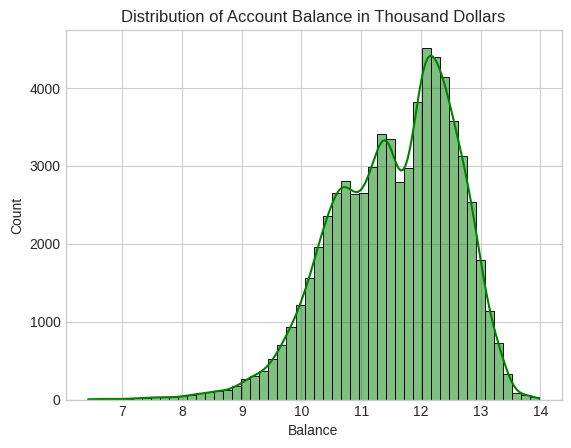

In [54]:
sns.histplot(df_encode['Balance'],bins=50,color='g', kde=True)

plt.title('Distribution of Account Balance in Thousand Dollars');

In [55]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Amount                   67463 non-null  int64  
 1   Funded Amount Investor   67463 non-null  float64
 2   Interest Rate            67463 non-null  float64
 3   Salary                   67463 non-null  float64
 4   Debit to Income          67463 non-null  float64
 5   Inquires - six months    67463 non-null  float64
 6   Open Account             67463 non-null  float64
 7   Revolving Balance        67463 non-null  float64
 8   Total Accounts           67463 non-null  float64
 9   Total Received Interest  67463 non-null  float64
 10  Total Received Late Fee  67463 non-null  float64
 11  Recoveries               67463 non-null  float64
 12  Collection Recovery Fee  67463 non-null  float64
 13  Last week Pay            67463 non-null  int64  
 14  Total Collection Amoun

## Cross Validation

**Model Choice: Logistic Regression** \\
Given that our dependent variable is binary, we opt for a Logistic Regression model. This choice aligns with the nature of our problem, where we aim to predict a boolean outcome.

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn import tree

In [57]:
df_encode.drop(['Inquires - six months','Revolving Balance'],axis=1,inplace=True)

In [58]:
X= df_encode.drop('Defaulted', axis=1)
y=df_encode['Defaulted']

In [59]:
smote=SMOTE()
smote.fit(X,y)
X,y=smote.fit_resample(X,y)

In [60]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [61]:
lgr = LogisticRegression(max_iter=500)
tr = tree.DecisionTreeClassifier()

In [62]:
skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=40)
lst_accu_stratified_lgr=[]
lst_accu_stratified_tr=[]

lst_fpr=[]
lst_tpr=[]

In [63]:
for train_index, test_index in skf.split(x_scaled, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lgr.fit(x_train_fold,y_train_fold)
    tr.fit(x_train_fold,y_train_fold)
    y_pred_fold_lgr= lgr.predict_proba(x_test_fold)[:,1]
    aucroc_lgr = roc_auc_score(y_test_fold, y_pred_fold_lgr)
    lst_accu_stratified_lgr.append(aucroc_lgr)

In [64]:
# Print the output.
print('List of possible accuracy in Logistic Regression:', lst_accu_stratified_lgr)
print('\nMaximum Accuracy That can be obtained from this Logistic Regression is:',
      max(lst_accu_stratified_lgr)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_lgr)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified_lgr)*100, '%')

List of possible accuracy in Logistic Regression: [0.9436634891812578, 0.9418183074544291, 0.9426934754853303, 0.9421090607757948, 0.9446867534796395]

Maximum Accuracy That can be obtained from this Logistic Regression is: 94.46867534796395 %

Minimum Accuracy: 94.18183074544291 %

Overall Accuracy: 94.29942172752902 %


In [ ]:
#The distribution of default cases as ratios per category.
#Over 95% of default cases can be found in the top 5 categories

(df.groupby('Loan Status')['Loan Title'].value_counts()[9:]/df.groupby('Loan Status')['Loan Title'].value_counts()[9:].sum())*100

Loan Status  Loan Title         
1            Refinance              46.739305
             Consolidation          42.893767
             Other Loan              4.005768
             Home Improvement        3.829515
             Major Purchase          1.137638
             Personal                0.432623
             Unknown Debt Relief     0.336485
             Medical                 0.336485
             Business                0.288415
Name: count, dtype: float64

## Random Forest Classifier Evaluation

### Results
Our Random Forest Classifier achieved an impressive accuracy of 96%, signifying its efficacy as a robust model for the given task.

**Conclusion** \\
With a high accuracy rate of 96%, the Random Forest Classifier demonstrates strong predictive capabilities, suggesting its suitability for the dataset. This result indicates the model's potential as a reliable choice for further analysis or application.

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
rfc = RandomForestClassifier( random_state=42)

In [67]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred_rfc= rfc.predict_proba(X_test)[:,1]

In [69]:
aucroc_rfc = roc_auc_score(y_test, y_pred_rfc)
aucroc_rfc

0.9577315946405982

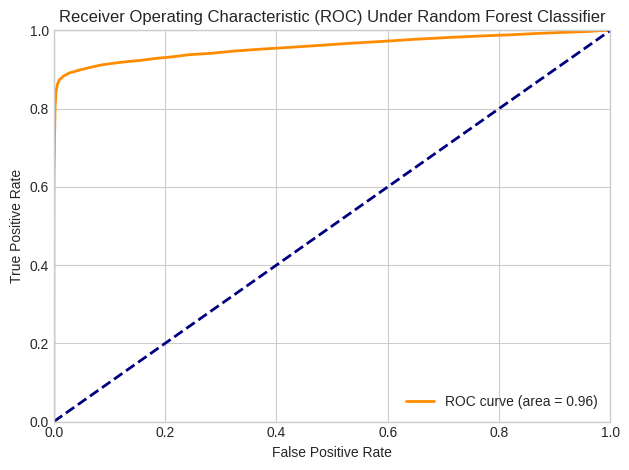

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)
roc_auc_rfc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2,
          label='ROC curve (area = %0.2f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Under Random Forest Classifier')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

## Decision Tree Evaluation

Our Decision Tree model demonstrated a robust **86%** accuracy in predicting outcomes, showcasing its effectiveness in handling the given data.

**Conclusion:**

In summary, the Decision Tree's strong predictive performance at **86%** accuracy establishes it as a reliable choice for this task. Further analysis may provide additional insights, but this result indicates a solid foundation for our model.


In [71]:
dt= tree.DecisionTreeClassifier()

In [72]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
y_pred_dt= dt.predict_proba(X_test)[:,1]

In [74]:
aucroc_dt = roc_auc_score(y_test, y_pred_dt)
aucroc_dt

0.8653819139703911

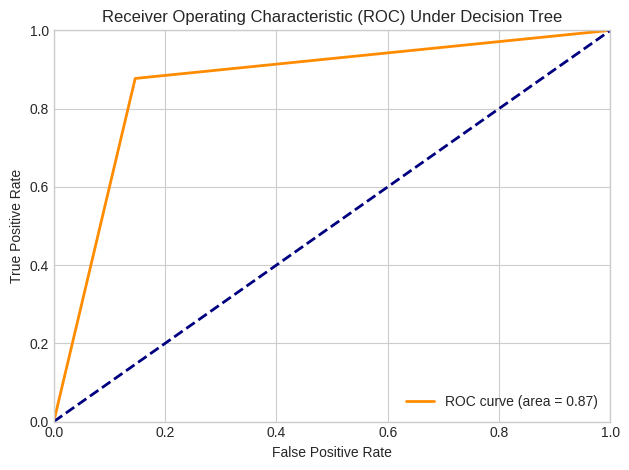

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2,
          label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Under Decision Tree')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()